Missing values:
 tenure_years              0
age_group                 0
department                0
role_level                0
support_1                 0
support_2                 0
support_3                 0
micro_1                   0
micro_2                   0
micro_3                   0
validation_1              0
validation_2              0
validation_3              0
psych_safety_1            0
psych_safety_2            0
inclusion                 0
recognition               0
work_life_balance         0
resources_tools           0
satisfaction              0
engagement                0
burnout                   0
intent_to_stay            0
commitment                0
self_rated_performance    0
competence_confidence     0
performance_score         0
dtype: int64


,tenure_years,support_1,support_2,support_3,micro_1,micro_2,micro_3,validation_1,validation_2,validation_3,...,work_life_balance,resources_tools,satisfaction,engagement,burnout,intent_to_stay,commitment,self_rated_performance,competence_confidence,performance_score
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000
mean,3.720000,3.040000,3.140000,3.090000,2.85000,3.020000,2.930000,2.820000,2.970000,2.830000,...,3.070000,3.190000,3.080000,2.950000,3.260000,2.84000,3.110000,2.920000,3.050000,81.49000
std,3.934001,1.413642,1.370836,1.414892,1.34371,1.370541,1.492439,1.380821,1.359256,1.318516,...,1.408882,1.383123,1.508762,1.431076,1.382576,1.43351,1.347613,1.353484,1.520068,12.19993
min,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,60.00000
25%,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,71.00000
50%,2.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,82.00000
75%,5.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,92.00000
max,20.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,100.00000


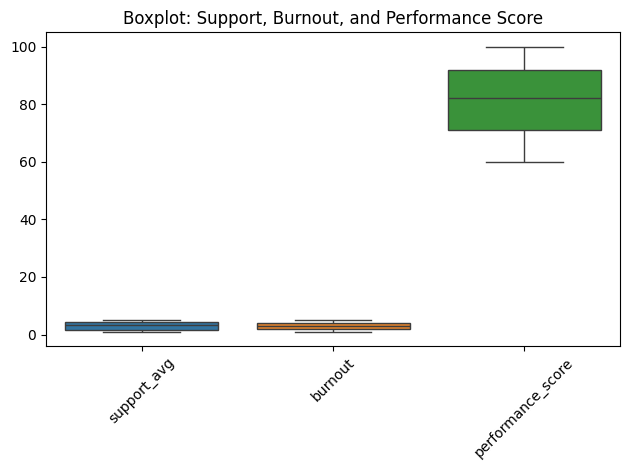

In [12]:
# --- Imports and Data Toggle ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Toggle between mock and real data
USE_MOCK_DATA = True

if USE_MOCK_DATA:
    data_path = "mock_survey_data.csv"
else:
    data_path = "real_survey_data.csv"  # Replace with real file later

df = pd.read_csv(data_path)

# --- Missing Values & Outlier Check ---
print("Missing values:\n", df.isnull().sum())
display(df.describe())
# --- Create Scale Averages ---
df['support_avg'] = df[['support_1', 'support_2', 'support_3']].mean(axis=1)
df['micro_avg'] = df[['micro_1', 'micro_2', 'micro_3']].mean(axis=1)
df['validation_avg'] = df[['validation_1', 'validation_2', 'validation_3']].mean(axis=1)
df['psych_safety_avg'] = df[['psych_safety_1', 'psych_safety_2']].mean(axis=1)

# Boxplot to visualize spread and spot outliers
sns.boxplot(data=df[['support_avg', 'burnout', 'performance_score']])
plt.title("Boxplot: Support, Burnout, and Performance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Support Cronbach’s Alpha: 0.893
Micromanagement Cronbach’s Alpha: 0.9
Validation Cronbach’s Alpha: 0.892
Psychological Safety Cronbach’s Alpha: 0.848


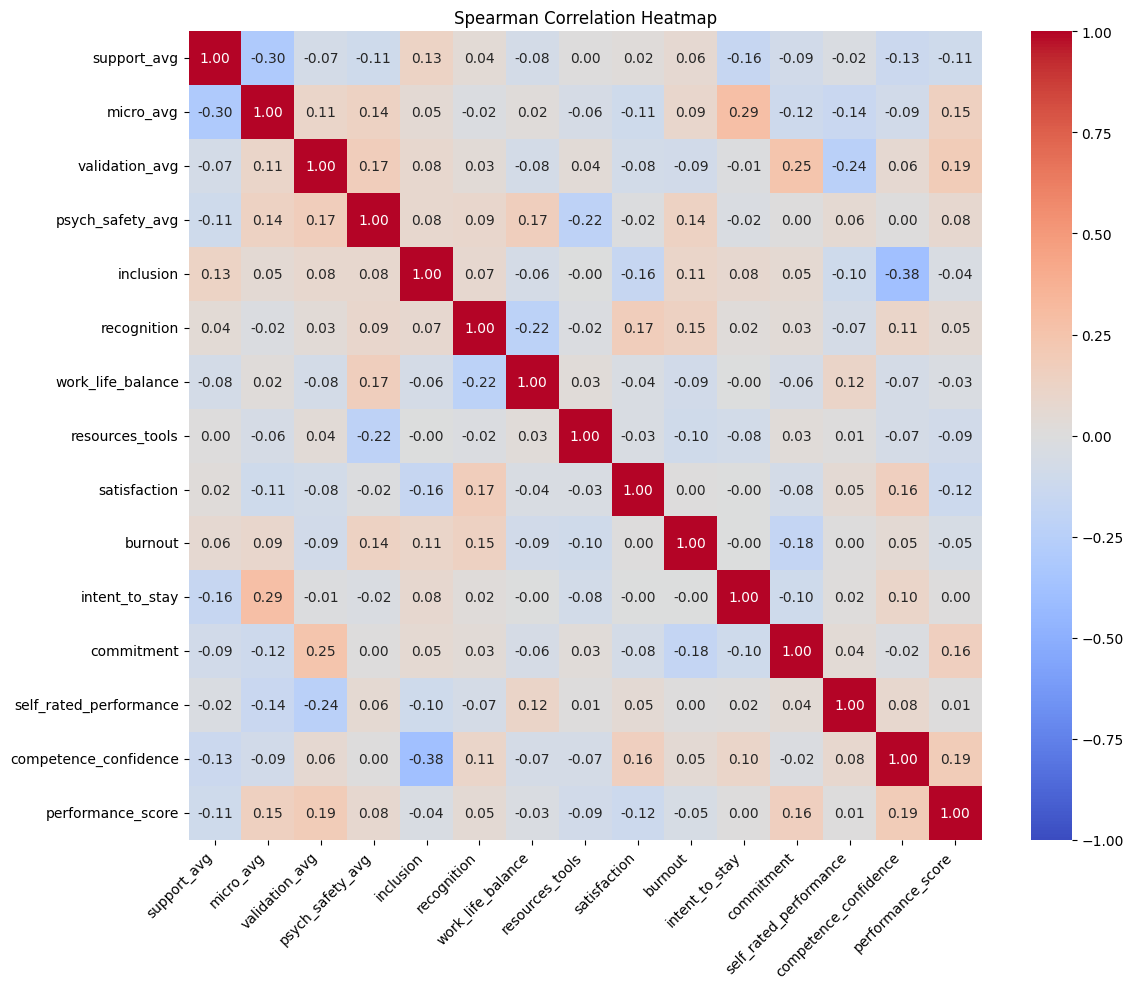

In [13]:
# --- Cronbach’s Alpha for multi-item scales ---
def print_alpha(label, columns):
    alpha, _ = pg.cronbach_alpha(df[columns])
    print(f"{label} Cronbach’s Alpha:", round(alpha, 3))

print_alpha("Support", ['support_1', 'support_2', 'support_3'])
print_alpha("Micromanagement", ['micro_1', 'micro_2', 'micro_3'])
print_alpha("Validation", ['validation_1', 'validation_2', 'validation_3'])
print_alpha("Psychological Safety", ['psych_safety_1', 'psych_safety_2'])



# --- Correlation Matrix and Heatmap ---
features = [
    'support_avg', 'micro_avg', 'validation_avg', 'psych_safety_avg',
    'inclusion', 'recognition', 'work_life_balance', 'resources_tools',
    'satisfaction', 'burnout', 'intent_to_stay', 'commitment',
    'self_rated_performance', 'competence_confidence', 'performance_score'
]

corr = df[features].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,Variable,Description,Scale
0,support_avg,Avg. manager support,1–5 Likert
1,micro_avg,Avg. micromanagement,1–5 Likert
2,validation_avg,Avg. validation,1–5 Likert
3,psych_safety_avg,Avg. psychological safety,1–5 Likert
4,inclusion,Sense of belonging,1–5 Likert
5,recognition,Perceived appreciation,1–5 Likert
6,work_life_balance,Work-life balance satisfaction,1–5 Likert
7,resources_tools,Access to tools/resources,1–5 Likert
8,satisfaction,Job satisfaction,1–5 Likert
9,burnout,Burnout,1–5 Likert


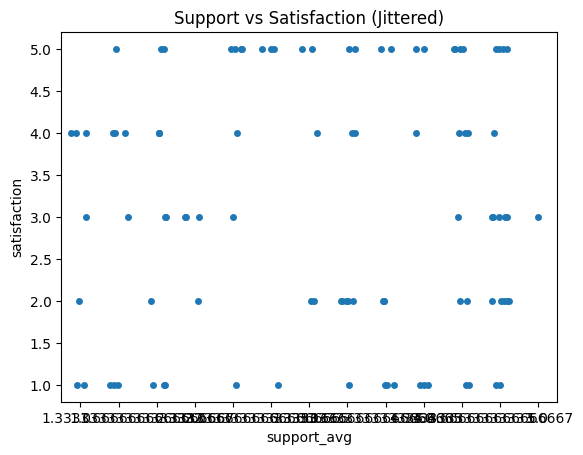

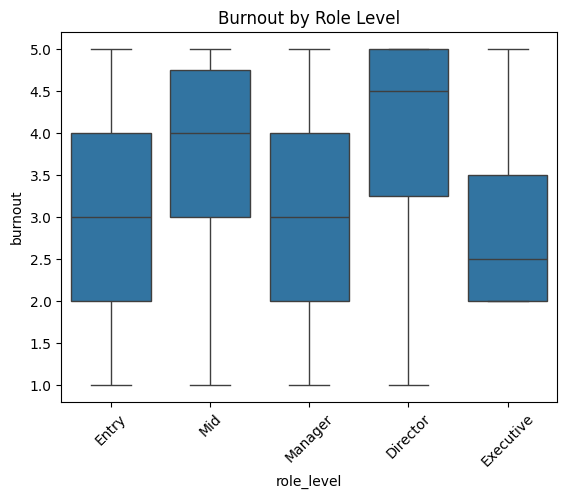

In [14]:
# --- Variable Reference Table ---
var_info = pd.DataFrame({
    'Variable': features,
    'Description': [
        'Avg. manager support', 'Avg. micromanagement', 'Avg. validation',
        'Avg. psychological safety', 'Sense of belonging',
        'Perceived appreciation', 'Work-life balance satisfaction',
        'Access to tools/resources', 'Job satisfaction', 'Burnout',
        'Intent to stay', 'Org. commitment', 'Self-rated performance',
        'Job confidence', '0–100 performance score'
    ],
    'Scale': ['1–5 Likert'] * 14 + ['0–100']
})

display(var_info)
var_info.to_csv("variable_reference_table.csv", index=False)

# --- Exploratory Visuals ---
# Scatterplot (with jitter) of support vs satisfaction
sns.stripplot(data=df, x='support_avg', y='satisfaction', jitter=0.25)
plt.title("Support vs Satisfaction (Jittered)")
plt.show()

# Boxplot of burnout by role level
order = ['Entry', 'Mid', 'Manager', 'Director', 'Executive']
sns.boxplot(data=df, x='role_level', y='burnout', order=order)
plt.title("Burnout by Role Level")
plt.xticks(rotation=45)
plt.show()
